# Validation: Minimum Number Active Cases

This notebook:

* loads a library defined model. 
* loads the data according to the data preprocessor class.
* Tests the effect of different minimum numbers of active cases on cm effectiveness

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
### Initial imports
import logging
import numpy as np
import pandas as pd
import pymc3 as pm
import theano.tensor as T
import matplotlib.pyplot as plt
import arviz as az
import seaborn as sns
import scipy
import copy

logging.basicConfig(level=logging.INFO)
log = logging.getLogger(__name__)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from epimodel.pymc3_models.utils import geom_convolution
from epimodel.pymc3_models import cm_effect
from epimodel.pymc3_models.cm_effect.datapreprocessor import DataPreprocessor
import sensitivityplotlib as spl

sns.set_style("ticks")
%matplotlib inline

In [3]:
min_active_cases = 500

INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Smoothing
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Albania
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Andorra
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Estonia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Iceland
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Latvia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Lithuania
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing New Zealand
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Singapore
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Slovakia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Masking


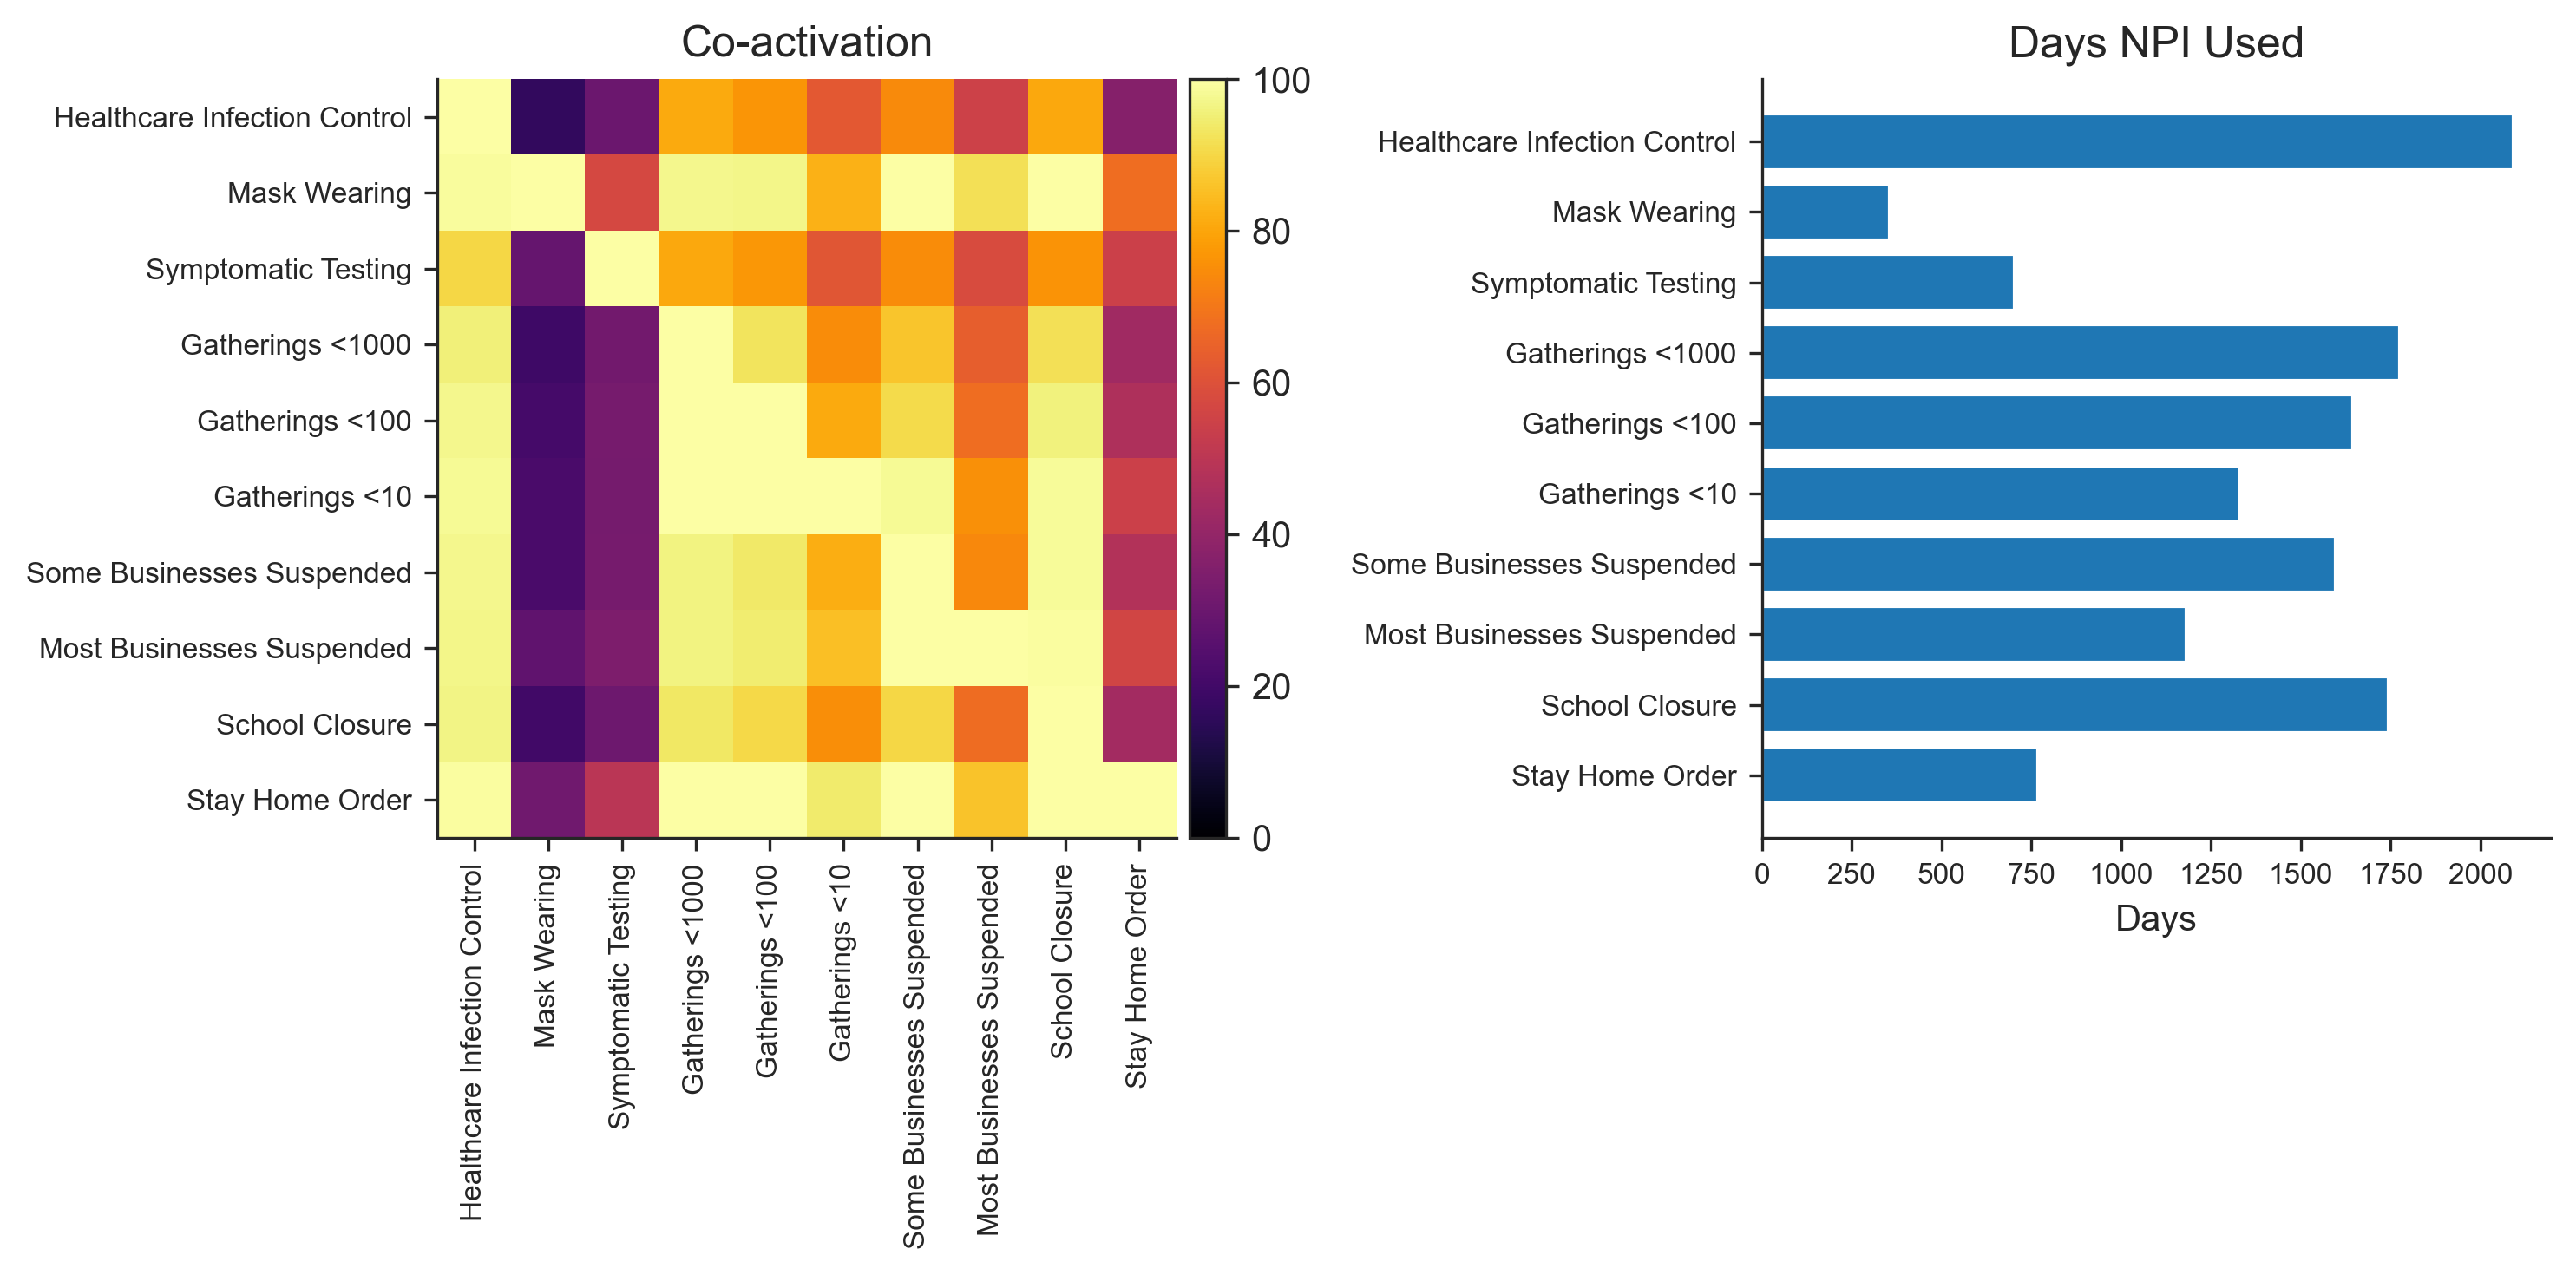

In [4]:
dp = DataPreprocessor()
dp.min_confirmed = min_active_cases
data = dp.preprocess_data("../final_data/data_final.csv")

### Specify models to run

In [5]:
model_types = ['active', 'combined']

## Build and run models

In [10]:
print('Minimum number of active cases: ' + str(min_active_cases))
for model_type in model_types:
    print('Model: ' + str(model_type))
    if model_type=='active':
        with cm_effect.models.CMActive_Final(data) as model:
                model.build_model()
    if model_type=='combined':
        with cm_effect.models.CMCombined_Final(data) as model:
                model.build_model()
model.run(2000)
cm_trace = model.trace["CMReduction"]
filename = 'out_final/min_confirmed_'+ str(model_type) + '_' + str(min_active_cases) + '.txt'
np.savetxt(filename, cm_trace)

Minimum number of active cases: 500
Model: combined


Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
INFO:pymc3:Initializing NUTS using adapt_diag...


CM_Alpha                      6.90
HyperRMean                   -0.94
HyperRVar_log__              -0.77
RegionLogR_offset            11.69
GrowthCases                3810.02
GrowthDeaths               3810.02
InitialSizeCases_log       -160.50
InitialSizeDeaths_log      -160.50
ObservedCases           -124854.17
ObservedDeaths           -75438.85
Name: Log-probability of test_point, dtype: float64


Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [InitialSizeDeaths_log, InitialSizeCases_log, GrowthDeaths, GrowthCases, RegionLogR_offset, HyperRVar, HyperRMean, CM_Alpha]
INFO:pymc3:NUTS: [InitialSizeDeaths_log, InitialSizeCases_log, GrowthDeaths, GrowthCases, RegionLogR_offset, HyperRVar, HyperRMean, CM_Alpha]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [1:27:24<00:00,  1.05s/draws]  
The number of effective samples is smaller than 10% for some parameters.


### Plot traces 

In [ ]:
for model in models:
    model.plot_traces()

### Plot countermeasure effectiveness

In [11]:
legend_title = 'Min Cases'
legend_labels = ['100 (default)','500']
cm_labels = data.CMs 

#### plot active model

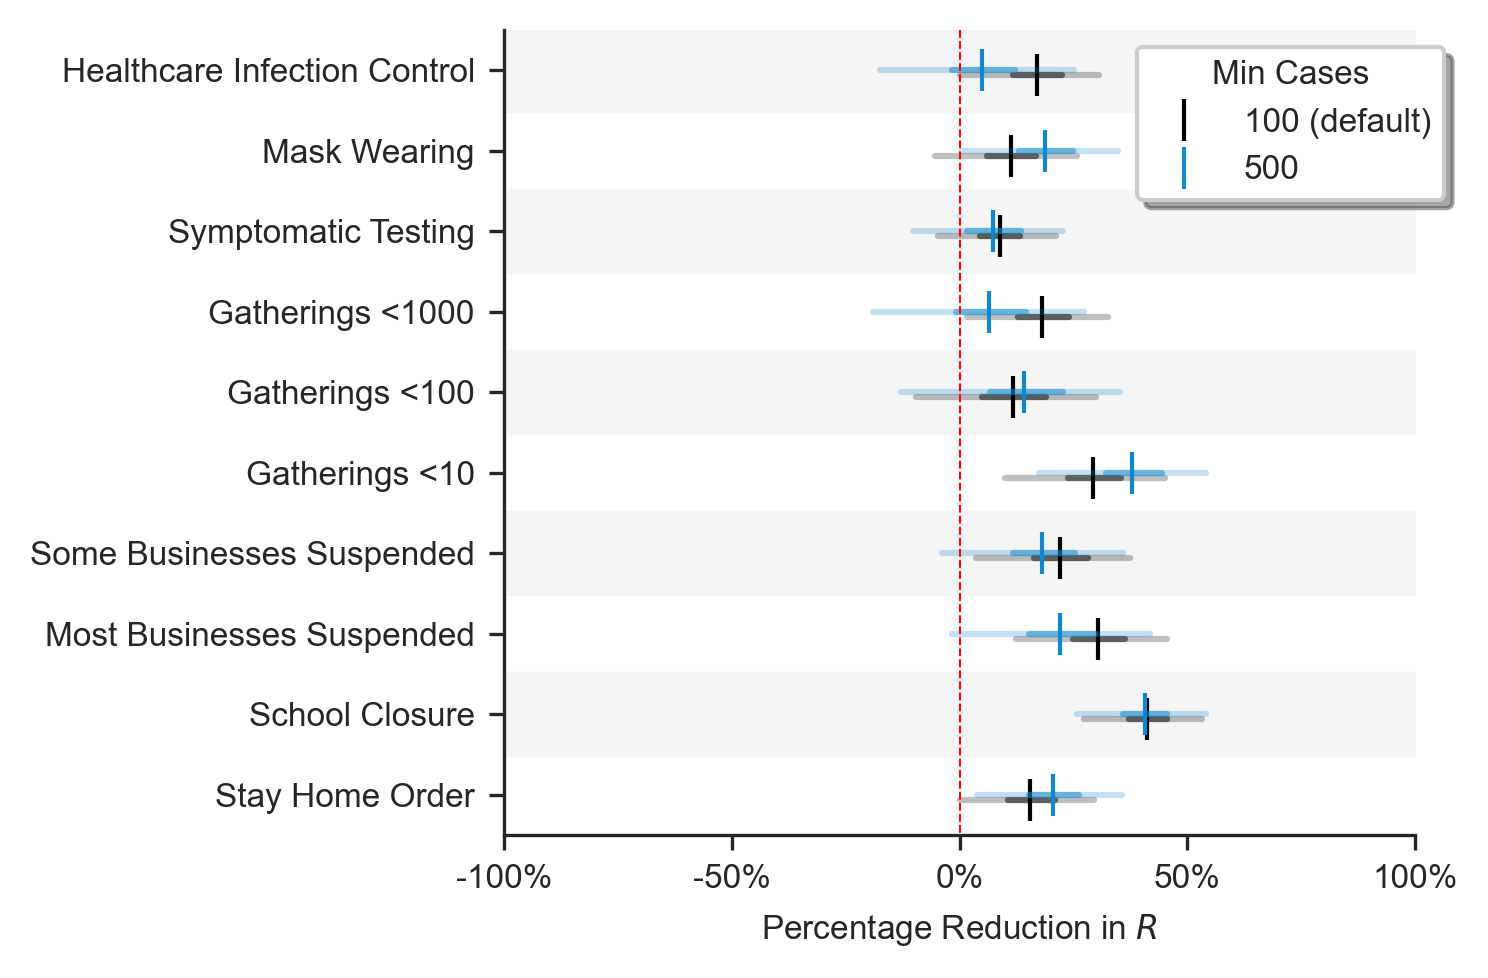

In [13]:
filenames = ['out_final/active_default.txt', 'out_final/min_confirmed_active_500.txt']
colors = ['black','tab:blue']

spl.plot_cm_effect_sensitivity(filenames, cm_labels, legend_labels,
                               legend_title=legend_title,
                               colors = colors,
                               bbox_to_anchor=(1.05,1))
plt.savefig('out_final/min_confirmed_active_sensitivity.pdf')

##### plot combined

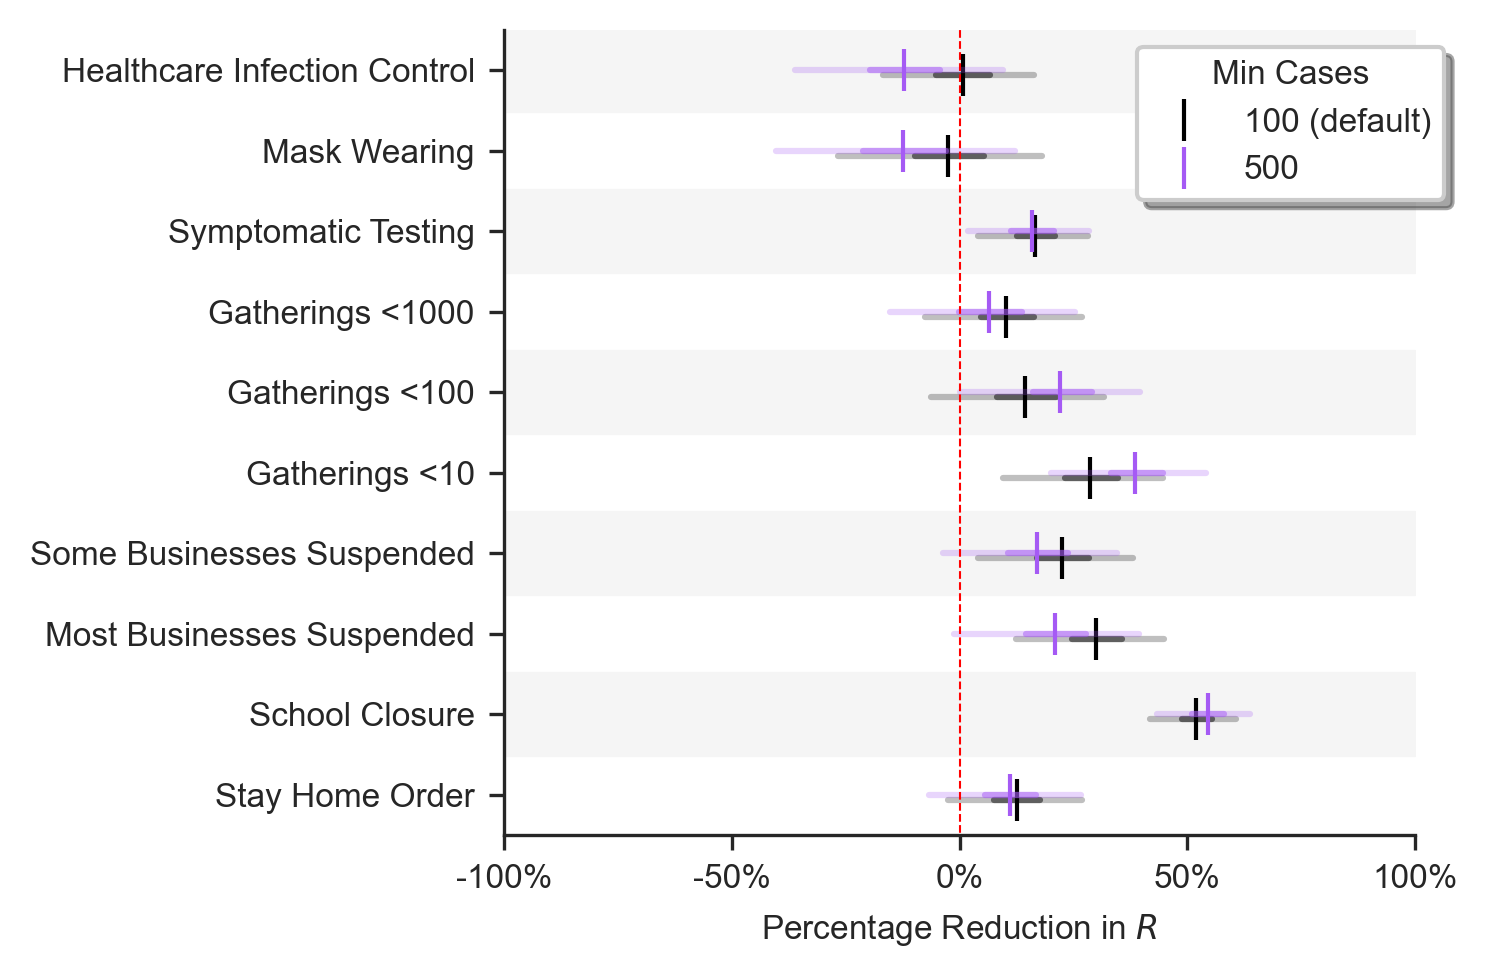

In [19]:
filenames = ['out_final/default_combined.txt', 'out_final/min_confirmed_combined_500.txt']
colors = colors = ['black','tab:purple']

spl.plot_cm_effect_sensitivity(filenames, cm_labels, legend_labels,
                               legend_title=legend_title,
                               colors = colors,
                               bbox_to_anchor=(1.05,1))
plt.savefig('out_final/min_confirmed_combined_sensitivity.pdf')